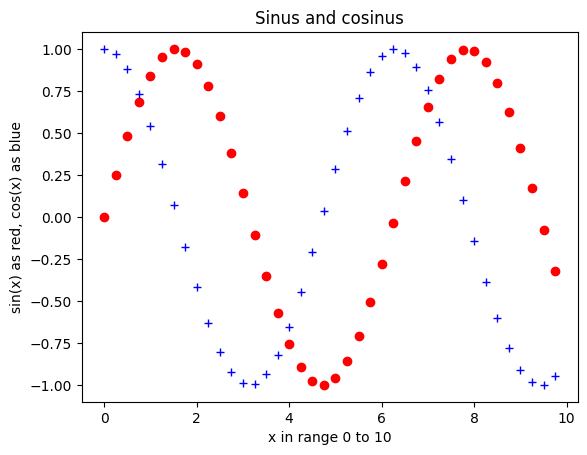

In [1]:
import matplotlib.pyplot as plt
import math

# x = 0.25, 0.5, 0.75, ... , 10.0
x = [n/4 for n in range(0,40)]
y1 = [math.sin(i) for i in x]
y2 = [math.cos(i) for i in x]
plt.plot(x, y1,'ro') # Plot 1
plt.plot(x, y2, 'b+') # Plot 2
plt.title('Sinus and cosinus')
plt.xlabel('x in range 0 to 10')
plt.ylabel('sin(x) as red, cos(x) as blue')
plt.show() # Display plot

In [2]:
import matplotlib
print(matplotlib.__version__)

3.8.2


In [4]:
import sys
print(sys.executable)

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python


In [22]:
import os
import csv

# Read map and convert symbols O,L,S to 0,1,2
def read_ground_map(map_path):

    lst = []
    with open(map_path, "r") as file:
        for line in file:
            print()
            print("line is: ", line)
            print()
            print("line.strip() is: ", line.strip())
            print()
            row = line.strip().split(",")  # ['L', 'L', 'O', 'L', 'L']       line.split(",")  ['L', 'L', 'O', 'L', 'L\n']
            print("row is: ",row)
            print()
            #row = line.split(",").strip()   -> error because strip cannot be done on the list objects (it can only done on the string objects)
            #print("row is: ",row)
            
            lst += [row]
    print("lst looks like:",lst)
    
    # "O" --> 0, "L" --> 1, "S" --> 2
    ground_map = []
    for row in lst:
        r = []
        for c in row:
            if c == "O":
                r += [0]
            elif c == "L":
                r += [1]
            else:
                r += [2]
        ground_map += [r]
    return ground_map



# Program starts
path = os.getcwd() + "/ground_maps/"
print("path is: ", path)

map_name = "simple.csv"  # simple.csv, small.csv, ...
ground_path = path + map_name
print("ground_path is: ", ground_path)

# Read ground, replace "O" --> 0, "L" --> 1, "S" --> 2
plot_map = read_ground_map(ground_path)
print("plot_map is:", plot_map)

szx, szy = len(plot_map), len(plot_map[0])
print(f"\nDisplaying map {map_name} with size {szx}x{szy}")



path is:  /Users/nemaaa/501/lawnmower_project/ground_maps/
ground_path is:  /Users/nemaaa/501/lawnmower_project/ground_maps/simple.csv

line is:  L,L,O,L,L


line.strip() is:  L,L,O,L,L

row is:  ['L', 'L', 'O', 'L', 'L']


line is:  L,L,O,L,L


line.strip() is:  L,L,O,L,L

row is:  ['L', 'L', 'O', 'L', 'L']


line is:  L,L,L,L,L


line.strip() is:  L,L,L,L,L

row is:  ['L', 'L', 'L', 'L', 'L']


line is:  L,L,L,S,L

line.strip() is:  L,L,L,S,L

row is:  ['L', 'L', 'L', 'S', 'L']

lst looks like: [['L', 'L', 'O', 'L', 'L'], ['L', 'L', 'O', 'L', 'L'], ['L', 'L', 'L', 'L', 'L'], ['L', 'L', 'L', 'S', 'L']]
plot_map is: [[1, 1, 0, 1, 1], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 2, 1]]
[1, 1, 0, 1, 1]

Displaying map simple.csv with size 4x5



Displaying map simple.csv with size 4x5
x0, y0 = 3, 0, xmax, ymax = 5, 4


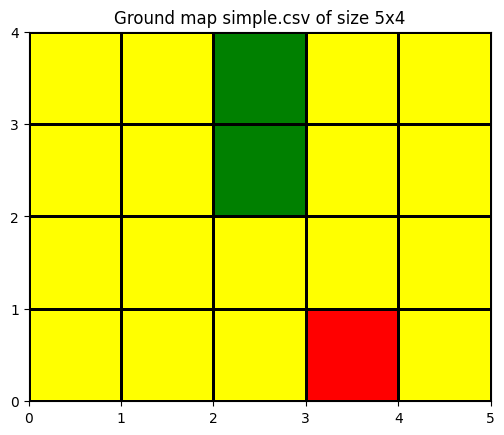


Simulation starts
hours = 2.0, delta = 0.1, steps = 72000


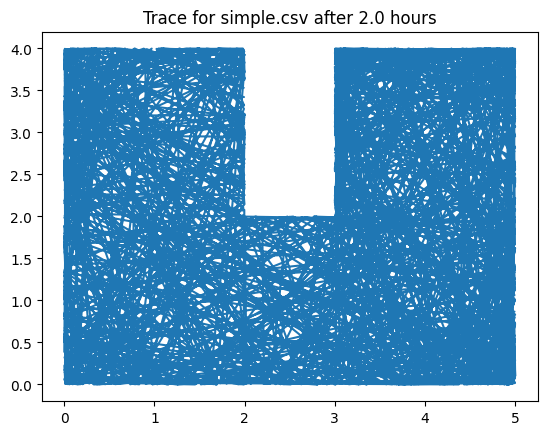


Coverage (N = 4) map size 20x16 (= 320), Unvisited lawn pixels 288
Visted pixels 288, Lawn coverage 1.0


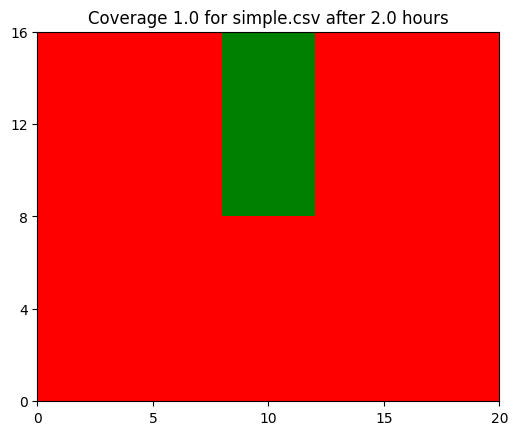

In [1]:
import os
import random
import math
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Golbal variables
v, delta = 0.3, 0.1   # Robot speed (m/s), time step (s)
xmax, ymax = 0, 0  # Upper ground boundaries
N = 4  # We divide all squares into N*N small pixels to measure coverage
hours = 2.0  # Simulation time in hours
coord_map = None  # Mapping from X,Y (integers) to gound map symbols 0,1,2


# Read map and convert symbols O,L,S to 0,1,2
def read_ground_map(map_path):
    lst = []
    with open(map_path, "r") as file:
        for line in file:
            row = line.strip().split(",")  # ["L","L","O",...]
            lst += [row]
    # "O" --> 0, "L" --> 1, "S" --> 2
    ground_map = []
    for row in lst:
        r = []
        for c in row:
            if c == "O":
                r += [0]
            elif c == "L":
                r += [1]
            else:
                r += [2]
        ground_map += [r]
    return ground_map


def plot_ground(plot_map, map_name):
    rows = len(plot_map)
    cols = len(plot_map[0])

    plt.figure()
    pmap = plot_map.copy()
    pmap.reverse()  # Otherwise displayed upside down by pcolormesh

    # Assign color to value: 0 = green, 1 = yellow, 2 = red
    color_map = ListedColormap(['green', 'yellow', 'red'], 'indexed')
    # Plot grid
    plt.pcolormesh(pmap, edgecolors='k', linewidth=1, cmap=color_map)

    # Fine tune plot layout
    ax = plt.gca()  # Get current axis object
    ax.set_yticks(range(0, rows+1, 1))
    ax.set_xticks(range(0, cols+1, 1))
    ax.set_aspect('equal')
    plt.title(f"Ground map {map_name} of size {cols}x{rows}")
    plt.show()


def build_coord_map(plot_map):
    szx = len(plot_map)
    szy = len(plot_map[0])

    coord_map = []
    for y in range(0, szy):
        col = []
        for x in range(szx-1, -1, -1):
            col += [plot_map[x][y]]
        coord_map += [col]
    return coord_map


def find_start(coord_map):
    global xmax, ymax
    xmax = len(coord_map)
    ymax = len(coord_map[0])
    for x in range(xmax):
        for y in range(ymax):
            if coord_map[x][y] == 2:
                return x, y


# *** Default approach with random directions
def get_random_velocity():
    alpha = random.uniform(0, 2*math.pi)
    vx = v*math.cos(alpha)
    vy = v*math.sin(alpha)
    return vx, vy


def one_step(x, y, vx, vy):
    xnew = x + vx * delta
    ynew = y + vy * delta
    while is_obstacle(xnew, ynew):
        vx, vy = get_random_velocity()
        xnew = x + vx * delta
        ynew = y + vy * delta
    return xnew, ynew, vx, vy


def is_obstacle(x, y):
    if x > xmax or x < 0:
        return True
    elif y > ymax or y < 0:
        return True
    else:
        X = int(x)
        Y = int(y)
        sym = coord_map[X][Y]
        return sym == 0  # Compare with "obstacle"


# Trace
def plot_trace(trace, map_name):
    x, y = [], []
    for p in trace:
        x.append(p[0])
        y.append(p[1])

    plt.figure()
    plt.plot(x, y)
    plt.title(f"Trace for {map_name} after {hours} hours")
    plt.show()


# Coverage
def setup_coverage():
    coverage = []
    pixels = 0
    for col in coord_map:
        lst = []
        # O = 0, L = 1, S = 2
        for sym in col:
            coverage_symbol = 0     # 0 ==> not visted yet
            if sym == 2:
                coverage_symbol = 0   # Not visited yet
            elif sym == 0:
                coverage_symbol = -1   # Obstacle

            if coverage_symbol == 0:
                pixels += N*N       # Lawn pixel count

            for i in range(N):  # Add N versions of symbol to column ==> extend column
                lst.append(coverage_symbol)

        coverage.append(lst)  # Add extended column
        for _i in range(N-1):  # Add N-1 copies column to coverage map
            cpy = lst.copy()
            coverage.append(cpy)
    return coverage, pixels


def plot_coverage(coverage, map_name, cov):
    # Adapt coverage to format suitable for pcolormesh
    plot_map = []
    sx = len(coverage)
    sy = len(coverage[0])
    for i in range(sy):
        lst = []
        for j in range(sx):
            val = coverage[j][i]
            if val > 0:
                val = 1  # val = 1 ==> visted at least once
            lst.append(val)
        plot_map.append(lst)

    plt.figure()
    cmap = ListedColormap(['green', 'yellow', 'red'], 'indexed')
    plt.pcolormesh(plot_map, edgecolors='k', linewidth=0, cmap=cmap)
    ax = plt.gca()
    ax.set_aspect('equal')
    ax.set_yticks(range(0, sy+1, sy//N))
    ax.set_xticks(range(0, sx+1, sx//N))

    plt.title(f"Coverage {cov} for {map_name} after {hours} hours")
    plt.show()


# Program starts
path = os.getcwd() + "/ground_maps/"
map_name = "simple.csv"  # simple.csv, small.csv, ...
ground_path = path + map_name

# Read ground, replace "O" --> 0, "L" --> 1, "S" --> 2
plot_map = read_ground_map(ground_path)
szx, szy = len(plot_map), len(plot_map[0])
print(f"\nDisplaying map {map_name} with size {szx}x{szy}")

# Build map with origo i lower left corner
coord_map = build_coord_map(plot_map)

x0, y0 = find_start(coord_map)
print(f"x0, y0 = {x0}, {y0}, xmax, ymax = {xmax}, {ymax}")

# Plot ground map
plot_ground(plot_map, map_name)

# Simulate a time limited run
print("\nSimulation starts")
steps = round(hours * 3600/delta)
x, y = x0, y0
trace = [(x0, y0)]
vx, vy = get_random_velocity()
print(f"hours = {hours}, delta = {delta}, steps = {steps}")

for step in range(steps):
    x, y, vx, vy = one_step(x, y, vx, vy)
    trace += [(x, y)]
plot_trace(trace, map_name)

# Setup coverage map
coverage, pixels = setup_coverage()
szx = len(coverage)
szy = len(coverage[0])
print(f"\nCoverage (N = {N}) map size {szx}x{szy} (= {szx*szy}), Unvisited lawn pixels {pixels}")


# Map trace to coverage and plot coverage
cover_cnt = 0
for x, y in trace:
    xpos = int(N*x)
    ypos = int(N*y)
    cov = coverage[xpos][ypos]

    if cov == 0:  # Not visted yet
        coverage[xpos][ypos] = 1
        cover_cnt += 1
    else:
        coverage[xpos][ypos] = cov + 1  # Count vists. Maybe a heat map?
cov = round(cover_cnt/pixels, 3)
print(f"Visted pixels {cover_cnt}, Lawn coverage {cov}")
plot_coverage(coverage, map_name, cov)